In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

import math
import scipy.optimize
from scipy.fftpack import fft
from scipy import signal

In [2]:
train = pd.read_csv('data/train_clean.csv', dtype={'time': np.float32, 'signal': np.float32, 'open_channels':np.int32})
test  = pd.read_csv('data/test_clean.csv',  dtype={'time': np.float32, 'signal': np.float32})

train_x = np.load('data/0_x_train.npy')
test_x  = np.load('data/0_x_test.npy')
train_y = np.load('data/1_linear_preds_train.npy')
test_y  = np.load('data/1_linear_preds_test.npy')

train_noise = np.load('data/2_noise_real_train.npy')
test_noise  = np.load('data/2_noise_linPred_test.npy')

train_x_segments = np.split(train_x, 10)
train_y_segments = np.split(train_y, 10)

test_x_segments = np.split(test_x, 20)
test_y_segments = np.split(test_y, 20)

# <center> ESPETOgramas
![](ESPETO.jpg)

Para pillar ... Hz, necesitaría una ventana de...
- **50** Hz -----> Ventana de **200**  (10000/50)
- **1150** Hz ---> Ventana de **8.69** (10000/1150)
- **1250** Hz ---> Ventana de **8**    (10000/1250)
- **1450** Hz ---> Ventana de **6.89** (10000/1450)
- **1550** Hz ---> Ventana de **6.45** (10000/1550)
- **2725** Hz ---> Ventana de **3.66** (10000/2725)
- **3125** Hz ---> Ventana de **3.2**  (10000/3125)

# Primeros 1000 puntos

Alto: 2001 (frecuancias dititntas de 0 a 5000)
Ancho 500 (logitud de la señal)


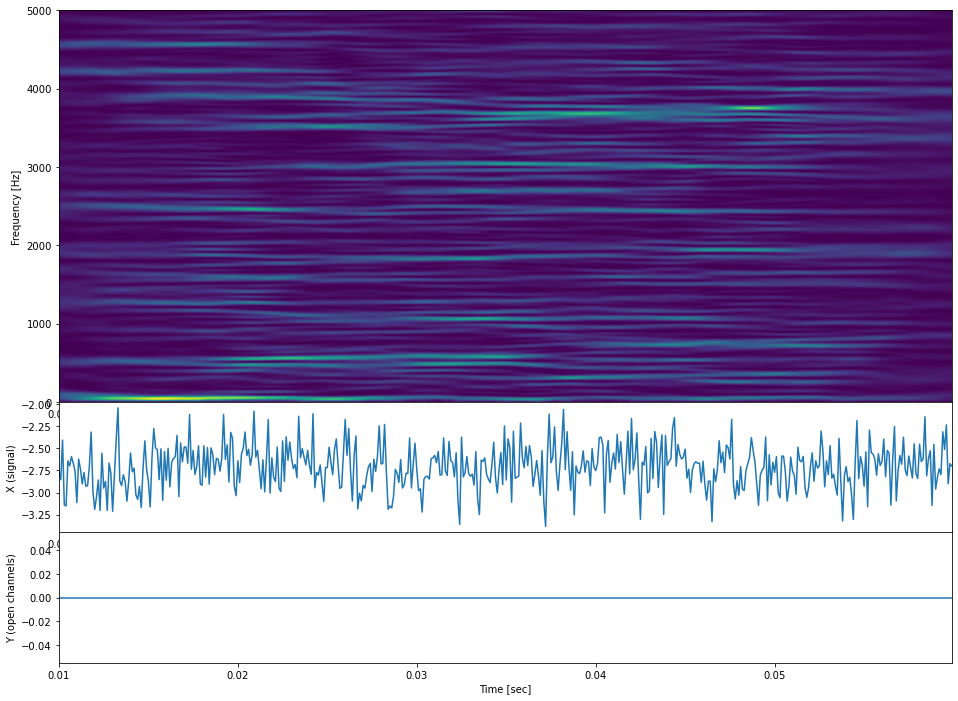

In [114]:
def espetograma(x, y, window=200, freq_mues=10000, plot=False):
    pad_x = np.pad(x, pad_width=(window//2, window//2-1), mode='edge')
    
    f, t, spec = signal.spectrogram(pad_x, fs=freq_mues, nfft=4000, nperseg=window, noverlap=window-1)
    
    print("Alto:", len(f), "(frecuancias dititntas de 0 a 5000)")
    print("Ancho", len(t), "(logitud de la señal)")#, spec.shape)

    if plot:        
        fig = plt.figure(figsize =(16,12))
        fig.subplots_adjust(hspace=0)
        gs = fig.add_gridspec(5, 1)
        ax1 = fig.add_subplot(gs[0:3,:])
        ax2 = fig.add_subplot(gs[3:4, :], sharex=ax1)
        ax3 = fig.add_subplot(gs[4:, :], sharex=ax1)
        
        ax1.pcolormesh(t, f, spec.clip(0,0.01))#.clip(0,0.001))
        ax1.set_ylabel('Frequency [Hz]')
        
        ax2.plot(t, x)
        ax2.set_ylabel('X (signal)')
        ax3.plot(t, y)
        ax3.set_ylabel('Y (open channels)')

        #plt.figure(figsize=(18, 12))
        #plt.pcolormesh(t, f, spec)#.clip(0,0.0002)
        
        plt.xlabel('Time [sec]')
        #ax1.colorbar()
        #plt.show()
    
    return f, t, spec

f, t, spec = espetograma(train_x[0:500], train_y[0:500], plot=True)

Alto: 2001 (frecuancias dititntas de 0 a 5000)
Ancho 100000 (logitud de la señal)


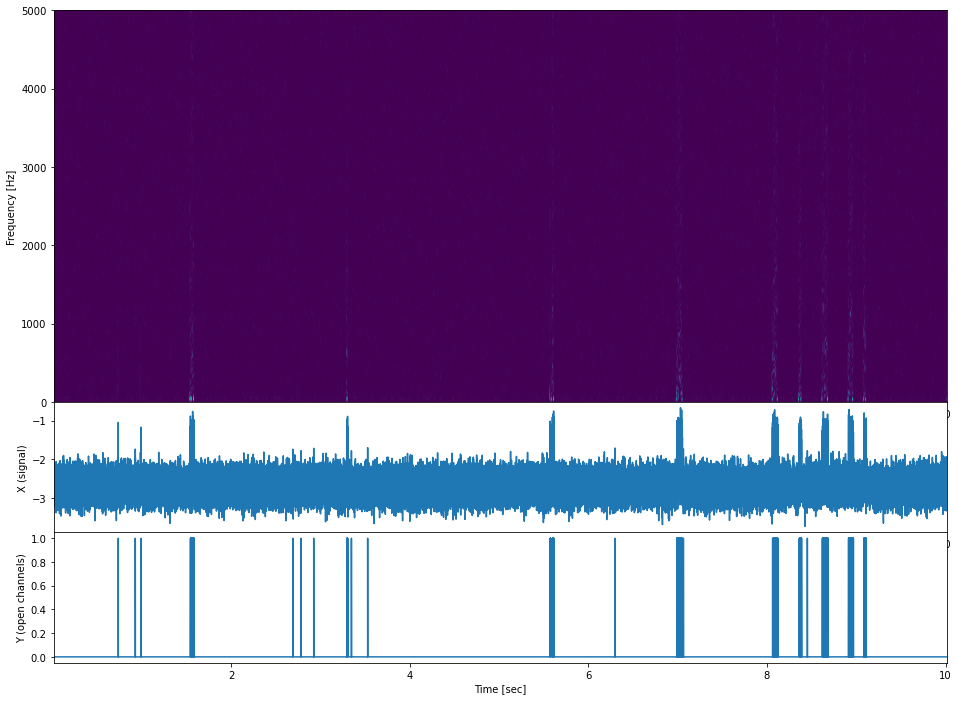

In [92]:
f, t, spec = espetograma(train_x[0:100000], train_y[0:100000], plot=True)

Alto: 2001 (frecuancias dititntas de 0 a 5000)
Ancho 1900 (logitud de la señal)


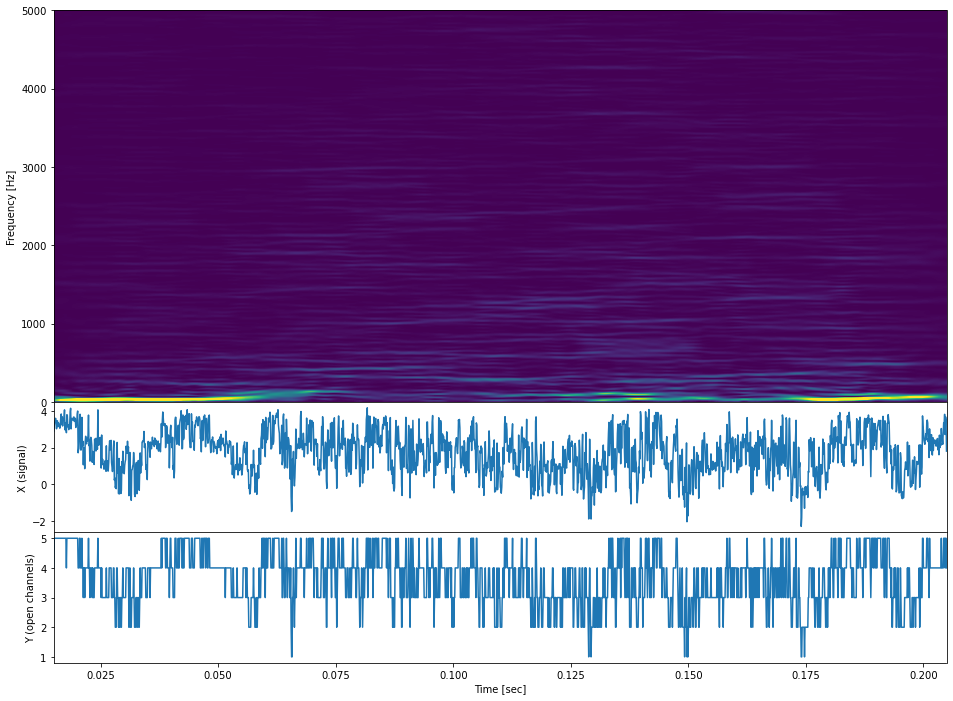

In [115]:
f, t, spec = espetograma(train_x[4000100:4002000],train_y[4000100:4002000], window=300, plot=True)

Alto: 2001 (frecuancias dititntas de 0 a 5000)
Ancho 1900 (logitud de la señal)


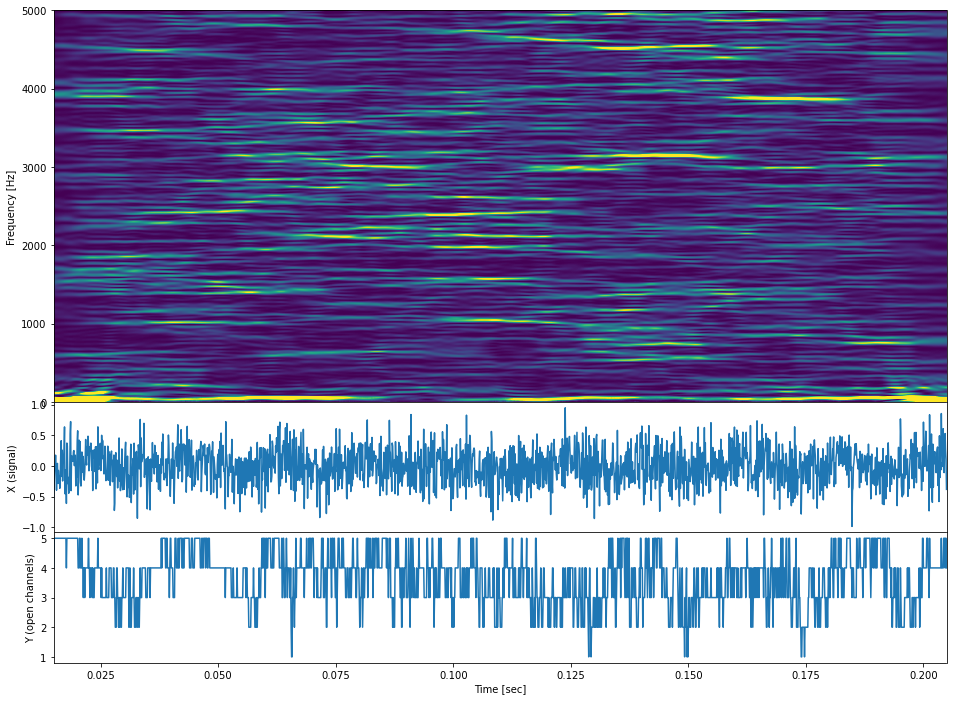

In [110]:
f, t, spec = espetograma(train_noise[4000100:4002000],train_y[4000100:4002000], window=300, plot=True)

Alto: 2001 (frecuancias dititntas de 0 a 5000)
Ancho 1000 (logitud de la señal)


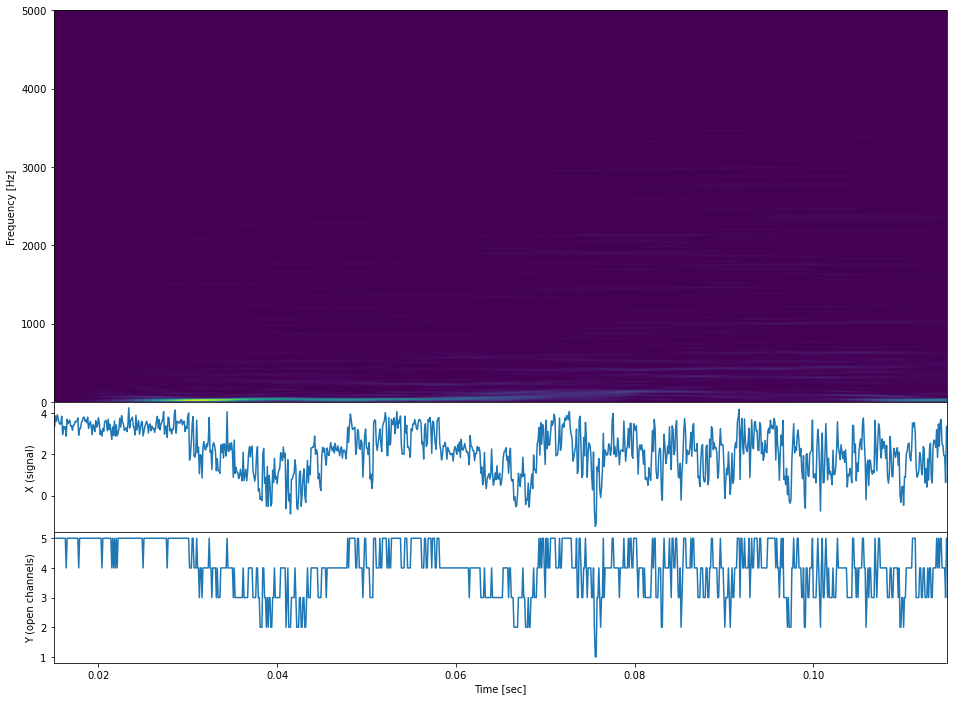

In [91]:
f, t, spec = espetograma(train_x[4000000:4001000],train_y[4000000:4001000],window=300,  plot=True)

In [49]:
f, t, spec = espetograma(train_noise[4000000:4001000], plot=True)

TypeError: espetograma() missing 1 required positional argument: 'y'

Log Señal padddeada: 1255
Alto: 1501 (frecuancias dititntas de 0 a 5000)
Ancho 1000 (logitud de la señal)


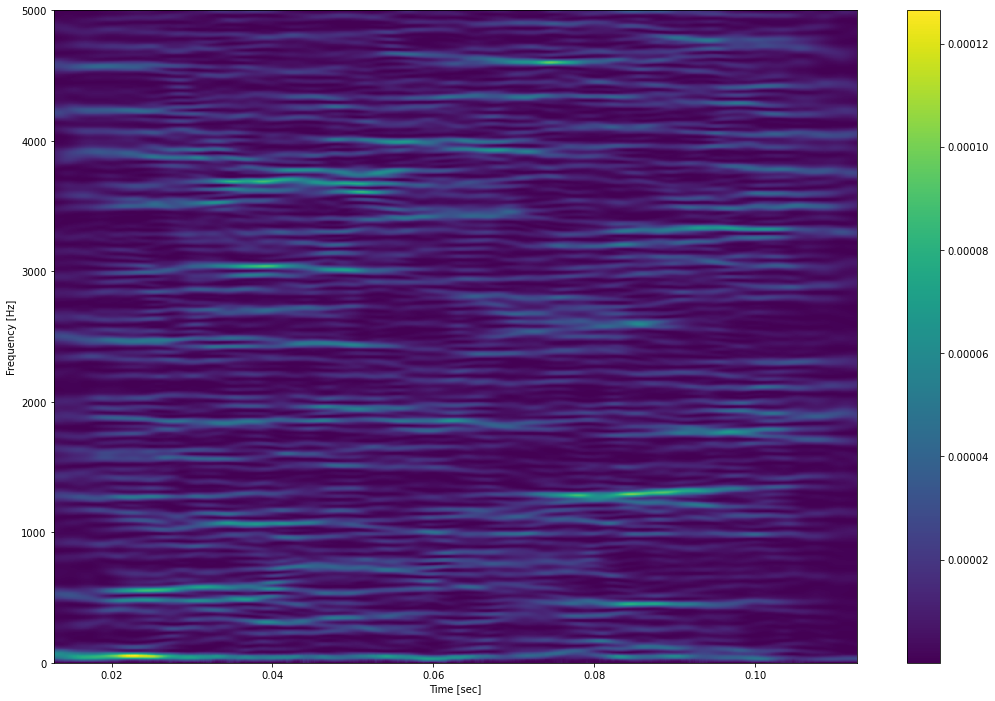

In [22]:
# nperseg:  Ancho de la ventana temporal (num per segmento)
# noverlap: Numero de solapamientode desplazando la ventana temporal
x = np.pad(train_x[0:1000], pad_width=(127,128), mode='edge')
n = np.pad(train_noise[0:1000], pad_width=(127,128), mode='constant', constant_values=0)

print("Log Señal padddeada:", len(s))

f, t, spec = signal.spectrogram(n, fs=10000, nfft=3000, nperseg=256, noverlap=255)
print("Alto:", len(f), "(frecuancias dititntas de 0 a 5000)")
print("Ancho", len(t), "(logitud de la señal)")#, spec.shape)

plt.figure(figsize=(18, 12))
plt.pcolormesh(t, f, spec.clip(0,0.0002))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()
#.clip(0,0.0002))

Alto: 1001 (frecuancias dititntas de 0 a 5000)
Ancho 2232


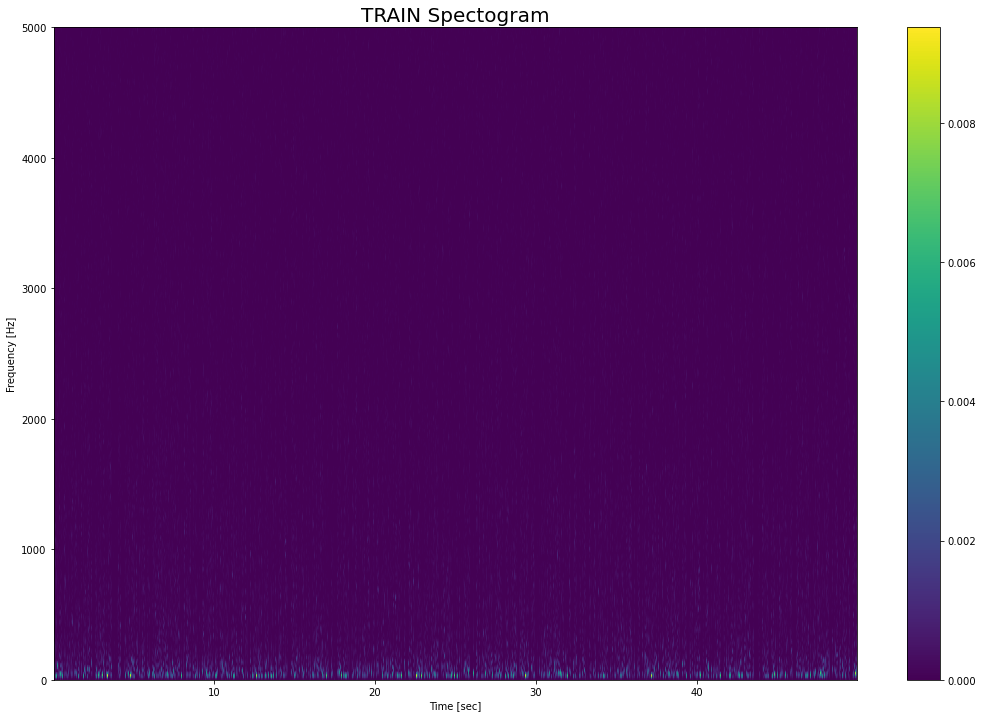

In [3]:
#signal = np.concatenate([train_noise[:]])
f, t, spec_ampls = signal.spectrogram(x=train_x[1000000:1500000],
                                fs=10000,
                                nfft=2000,
                                #nperseg=None,
                                #noverlap=None,
                                #return_onesided=False,
                                #mode="phase"
                               )

f, t, spec_fases = signal.spectrogram(x=train_noise[:500000],
                                fs=10000,
                                nfft=2000,
                                #nperseg=None,
                                #noverlap=None,
                                #return_onesided=False,
                                mode="phase"
                               )

print("Alto:", len(f), "(frecuancias dititntas de 0 a 5000)")
print("Ancho", len(t))#, spec.shape)

plt.figure(figsize=(18, 12))
plt.pcolormesh(t, f, spec_ampls)#.clip(0,0.0002))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('TRAIN Spectogram', fontsize=20)
plt.colorbar()
plt.show()

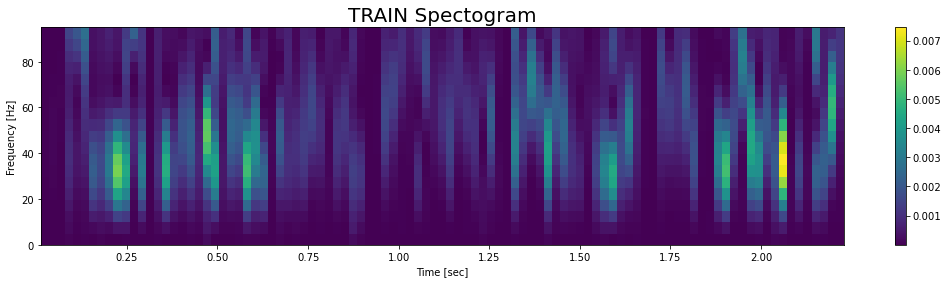

In [4]:
plt.figure(figsize=(18, 4))
plt.pcolormesh(t[:100], f[:20], spec_ampls[:20,:100])#.clip(0,0.0002))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('TRAIN Spectogram', fontsize=20)
plt.colorbar()
plt.show()

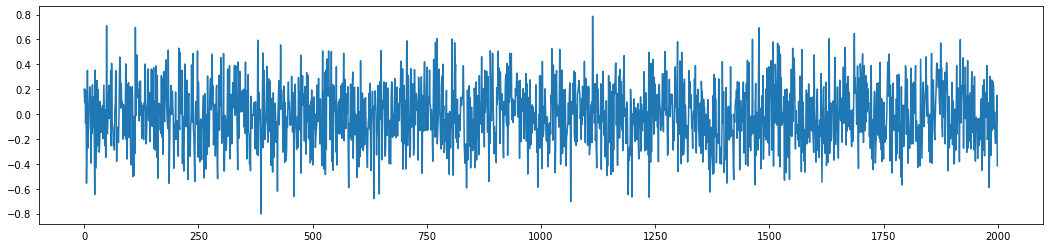

In [5]:
plt.figure(figsize=(18, 4)); plt.plot(train_noise[999000:1001000])#.clip(0,0.0002))

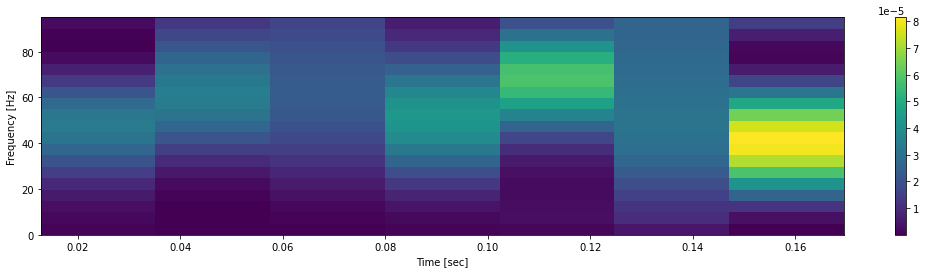

In [6]:
f, t, spec = signal.spectrogram(train_noise[999000:1001000], fs=10000, nfft=2000)
plt.figure(figsize=(18, 4))
plt.pcolormesh(t, f[:20], spec[:20])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()
#.clip(0,0.0002))

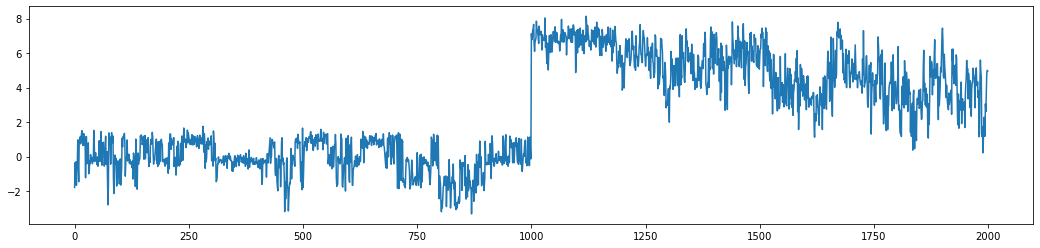

In [7]:
plt.figure(figsize=(18, 4)); plt.plot(train_x[1999000:2001000])#.clip(0,0.0002));

In [8]:
a = np.array([1,2,3,4,5,6])
np.pad(a, pad_width=3, mode='edge')

array([1, 1, 1, 1, 2, 3, 4, 5, 6, 6, 6, 6])

In [9]:
len(train_noise[1999000:2000000])

1000

In [14]:
s = np.pad(train_noise[1999000:2000000], pad_width=(127,128), mode='constant', constant_values=0)
s = np.pad(train_noise[0:1000], pad_width=(127,128), mode='constant', constant_values=0)
s = np.pad(train_noise[0:1000], pad_width=(127,128), mode='constant', constant_values=0)
#s = np.pad(train_noise[1000000:1010000], pad_width=(127,128), mode='constant', constant_values=0)
len(s)

1255

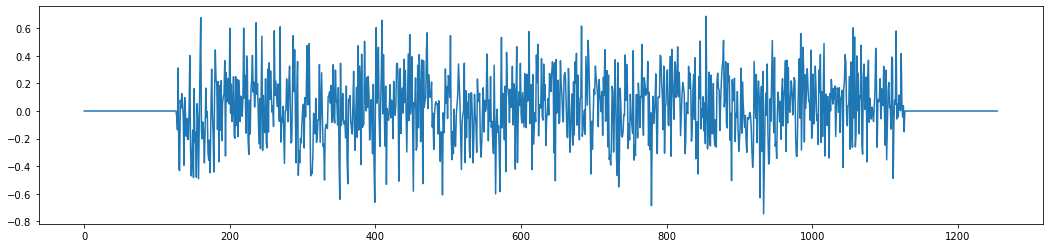

In [179]:
plt.figure(figsize=(18, 4)); plt.plot(s)#.clip(0,0.0002))

Alto: 10001 (frecuancias dititntas de 0 a 5000)
Ancho 977


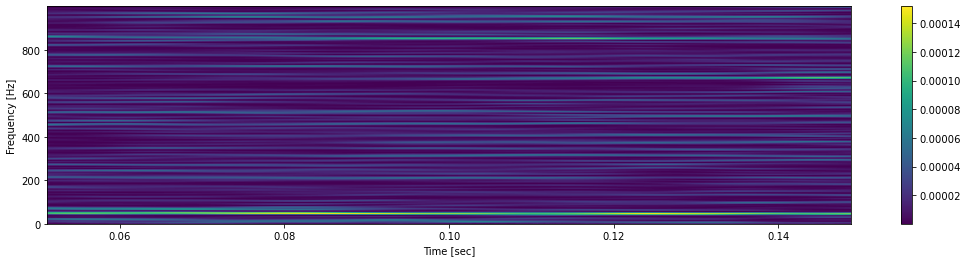

In [142]:
# nperseg:  Ancho de la ventana temporal (num per segmento)
# noverlap: Numero de solapamientode desplazando la ventana temporal

f, t, spec = signal.spectrogram(train_noise[1998000:2000000], fs=10000, nfft=20000, nperseg=1024, noverlap=1023)
print("Alto:", len(f), "(frecuancias dititntas de 0 a 5000)")
print("Ancho", len(t))#, spec.shape)

plt.figure(figsize=(18, 4))
plt.pcolormesh(t, f[:2000], spec[:2000])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()
#.clip(0,0.0002))

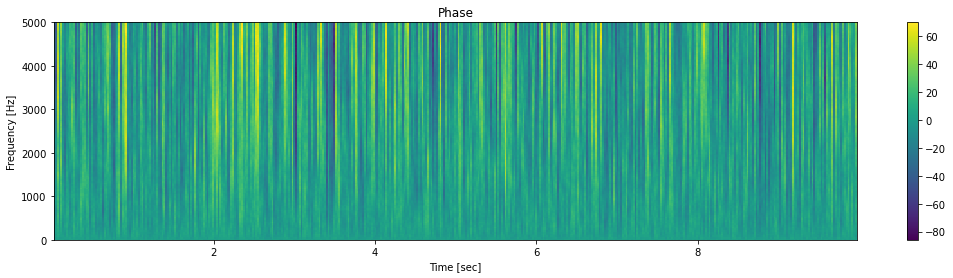

In [35]:
f, t, spec = signal.spectrogram(train_noise[:100000], fs=10000, mode="phase")
plt.figure(figsize=(18, 4))
plt.pcolormesh(t, f, spec)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Phase')
plt.colorbar()
plt.show()

# Hacerlo más amplio por interpolación

In [2]:
from scipy.interpolate import interp1d

x = np.arange(0, 10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

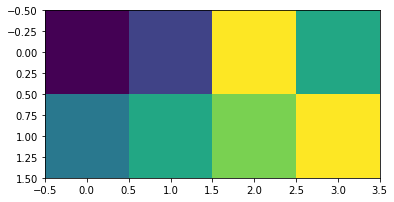

In [3]:
ejex = np.linspace(0, 10, num=4)
vals = np.array([[1, 2, 6, 4], [3, 4, 5, 6]])

plt.imshow(vals);

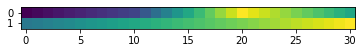

In [4]:
f = interp1d(ejex, vals)

new_ejex = np.linspace(0, 10, num=31, endpoint=True)
new_vals = f(new_ejex)
plt.imshow(new_vals);

(array([[501.,   0.,   0., ...,   0.,   0.,   0.],
        [501.,   0.,   0., ...,   0.,   0.,   0.],
        [501.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [501.,   0.,   0., ...,   0.,   0.,   0.],
        [501.,   0.,   0., ...,   0.,   0.,   0.],
        [501.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([3.22345953e-15, 9.96470663e-04, 1.99294133e-03, 2.98941199e-03,
        3.98588265e-03, 4.98235331e-03, 5.97882398e-03, 6.97529464e-03,
        7.97176530e-03, 8.96823596e-03, 9.96470663e-03]),
 <a list of 22321 Lists of Patches objects>)

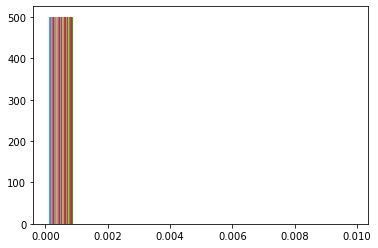

In [9]:
plt.hist(spec)

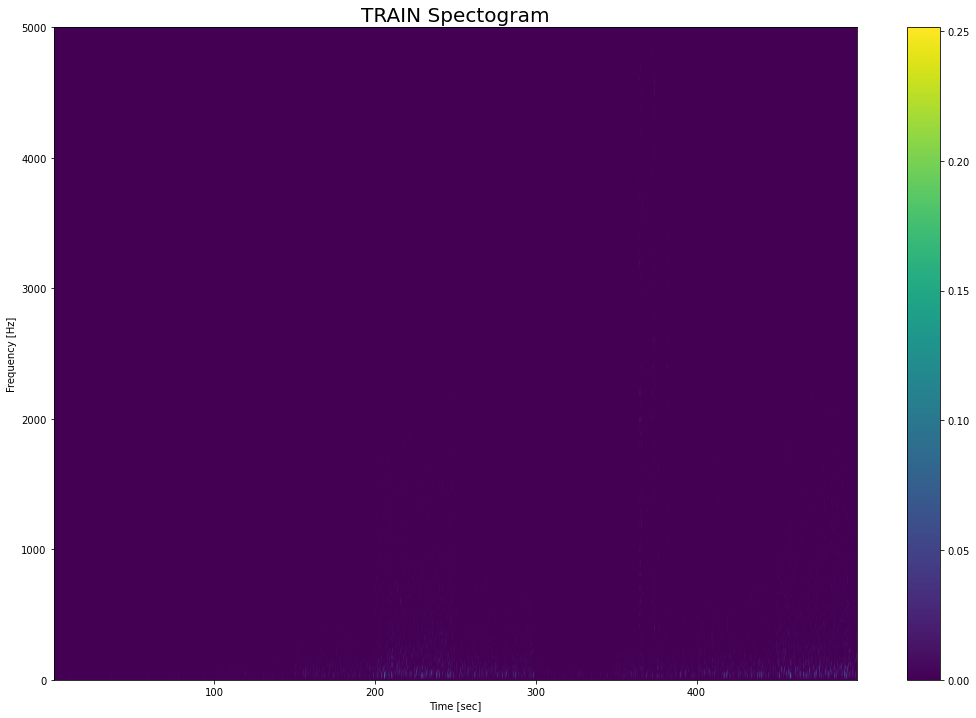

In [17]:
plt.figure(figsize=(18, 12))
plt.pcolormesh(t, f, np.log(spec+1))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('TRAIN Spectogram', fontsize=20)
plt.colorbar()
plt.show()

# Spectogram TEST

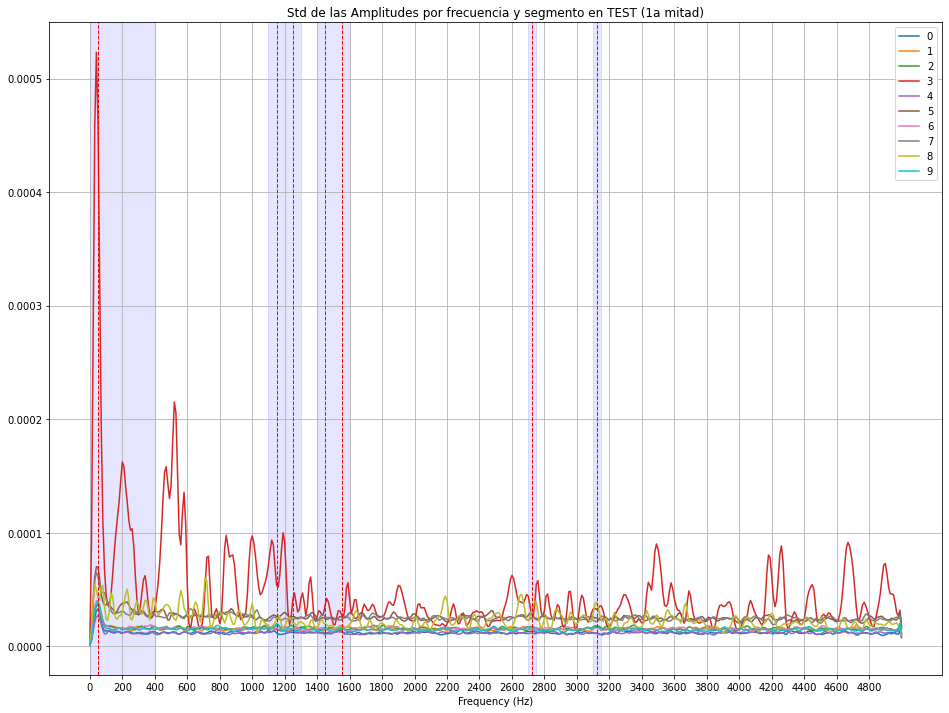

In [6]:
plt.figure(figsize=(16, 12))

plt.grid()
plt.xticks(np.arange(0, 5000, 200))
plt.xlabel("Frequency (Hz)")


for i,n in enumerate(np.split(test_noise, 20)):
    if i==10: break
    f, t, spec = signal.spectrogram(x=n, fs=10000, nfft=1000)
    plt.plot(f, spec.std(axis=1));
plt.legend([str(i) for i in range(10)])
plt.axvspan(0,     400, alpha=0.1, color='blue')
plt.axvspan(1100, 1300, alpha=0.1, color='blue')
plt.axvspan(1400, 1600, alpha=0.1, color='blue')
plt.axvspan(2700, 2750, alpha=0.1, color='blue')
plt.axvspan(3100, 3150, alpha=0.1, color='blue')
plt.axvline(50,   color='r', linestyle='--', linewidth=1)
plt.axvline(1150, color='r', linestyle='--', linewidth=1)
plt.axvline(1250, color='r', linestyle='--', linewidth=1)
plt.axvline(1450, color='r', linestyle='--', linewidth=1)
plt.axvline(1550, color='r', linestyle='--', linewidth=1)
plt.axvline(2725, color='r', linestyle='--', linewidth=1)
plt.axvline(3125, color='r', linestyle='--', linewidth=1)
plt.title("Std de las Amplitudes por frecuencia y segmento en TEST (1a mitad)");

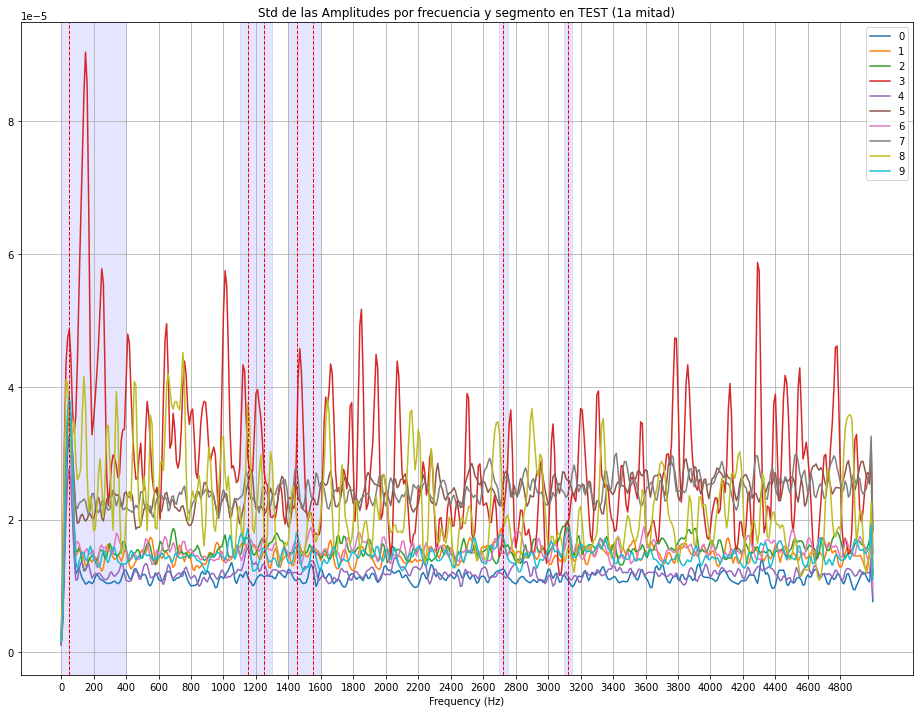

In [11]:
plt.figure(figsize=(16, 12))

plt.grid()
plt.xticks(np.arange(0, 5000, 200))
plt.xlabel("Frequency (Hz)")


for i,n in enumerate(np.split(test_noise, 20)):
    if i==10: break
    f, t, spec = signal.spectrogram(x=n, fs=10000, nfft=1000)
    plt.plot(f, spec.std(axis=1));
plt.legend([str(i) for i in range(10)])
plt.axvspan(0,     400, alpha=0.1, color='blue')
plt.axvspan(1100, 1300, alpha=0.1, color='blue')
plt.axvspan(1400, 1600, alpha=0.1, color='blue')
plt.axvspan(2700, 2750, alpha=0.1, color='blue')
plt.axvspan(3100, 3150, alpha=0.1, color='blue')
plt.axvline(50,   color='r', linestyle='--', linewidth=1)
plt.axvline(1150, color='r', linestyle='--', linewidth=1)
plt.axvline(1250, color='r', linestyle='--', linewidth=1)
plt.axvline(1450, color='r', linestyle='--', linewidth=1)
plt.axvline(1550, color='r', linestyle='--', linewidth=1)
plt.axvline(2725, color='r', linestyle='--', linewidth=1)
plt.axvline(3125, color='r', linestyle='--', linewidth=1)
plt.title("Std de las Amplitudes por frecuencia y segmento en TEST (1a mitad)");

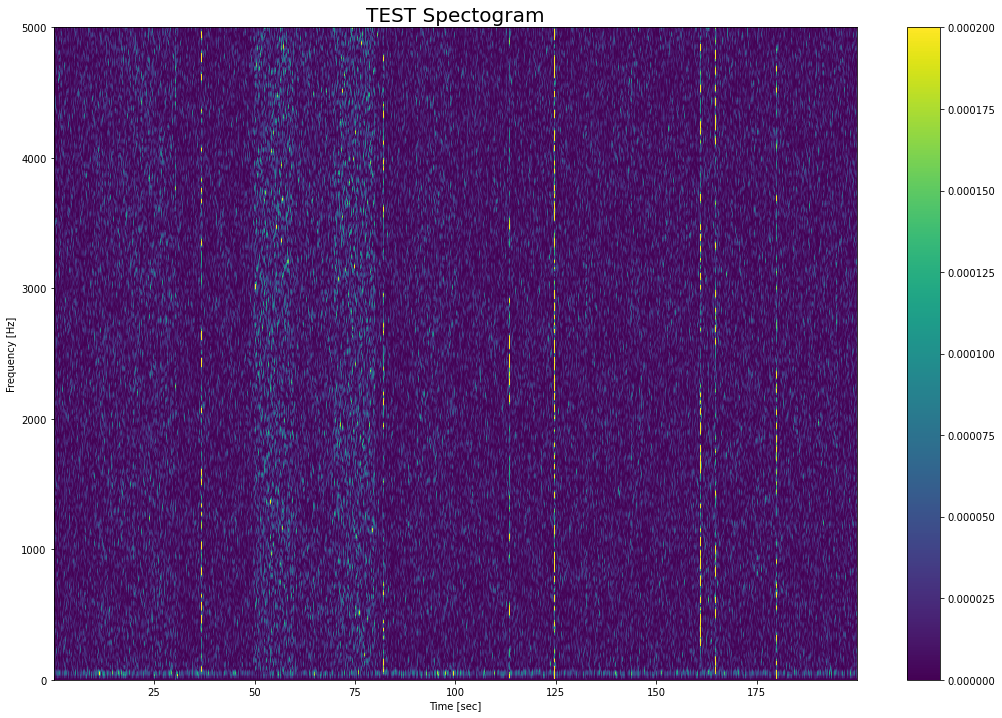

In [79]:
f, t, spec = signal.spectrogram(x=test_noise, fs=10000, nfft=1000)
plt.figure(figsize=(18, 12))
plt.pcolormesh(t, f, spec.clip(0,0.0002))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('TEST Spectogram', fontsize=20)
plt.colorbar()
plt.show()